In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('letter-recognition.data.txt', header = None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
df.columns = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

In [ ]:
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
X = df[df.columns[1: ]]

In [ ]:
Y = df['lettr']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 30)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

['A' 'L' 'O' ... 'N' 'T' 'C']
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       229
           B       1.00      1.00      1.00       228
           C       1.00      1.00      1.00       220
           D       1.00      1.00      1.00       219
           E       1.00      1.00      1.00       232
           F       1.00      1.00      1.00       225
           G       1.00      1.00      1.00       234
           H       1.00      1.00      1.00       206
           I       1.00      1.00      1.00       236
           J       1.00      1.00      1.00       209
           K       1.00      1.00      1.00       213
           L       1.00      1.00      1.00       239
           M       1.00      1.00      1.00       240
           N       1.00      1.00      1.00       239
           O       1.00      1.00      1.00       243
           P       1.00      1.00      1.00       243
           Q       1.00      1.00      1.00       2

[Text(0.31170187237358377, 0.9722222222222222, 'X[14] <= 2.5\nentropy = 4.699\nsamples = 6000\nvalue = [229, 228, 220, 219, 232, 225, 234, 206, 236, 209\n213, 239, 240, 239, 243, 243, 228, 230, 220, 234\n235, 228, 250, 237, 252, 231]'),
 Text(0.05516344725111441, 0.9166666666666666, 'X[12] <= 2.5\nentropy = 3.914\nsamples = 2095\nvalue = [110, 0, 17, 19, 0, 103, 0, 65, 159, 162, 40, 150\n185, 189, 21, 20, 3, 2, 2, 149, 183, 172, 193, 1\n150, 0]'),
 Text(0.02118545690936107, 0.8611111111111112, 'X[6] <= 8.5\nentropy = 3.356\nsamples = 1130\nvalue = [93, 0, 17, 15, 0, 102, 0, 7, 159, 162, 5, 149\n0, 0, 20, 20, 3, 0, 2, 141, 2, 83, 0, 1, 149\n0]'),
 Text(0.006802563150074294, 0.8055555555555556, 'X[10] <= 3.5\nentropy = 2.555\nsamples = 618\nvalue = [93, 0, 6, 15, 0, 2, 0, 7, 153, 158, 5, 149, 0\n0, 20, 2, 3, 0, 1, 0, 2, 0, 0, 1, 1, 0]'),
 Text(0.002228826151560178, 0.75, 'X[8] <= 3.5\nentropy = 1.492\nsamples = 295\nvalue = [93, 0, 0, 1, 0, 0, 0, 0, 0, 52, 0, 149, 0, 0\n0, 0, 0, 0, 0, 0,

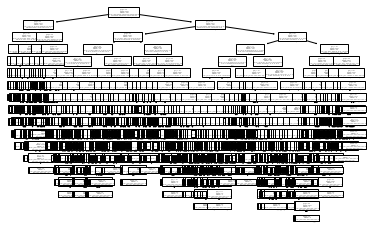

In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
dtree.fit(X_test, Y_test)
predictions = dtree.predict(X_test)
print(predictions)
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))
# fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 16), dpi = 1024)
tree.plot_tree(dtree)
# fig.savefig('decision.png')

In [ ]:
s_dt = cross_val_score(dtree, X, Y, cv = 5, scoring = 'accuracy')
print(s_dt)
print(s_dt.mean())

[0.87875 0.893   0.876   0.88875 0.8765 ]
0.8825999999999998


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))
s_knn = cross_val_score(knn, X, Y, cv = 5, scoring = 'accuracy')
print(s_knn)
print(s_knn.mean())

              precision    recall  f1-score   support

           A       0.97      1.00      0.98       229
           B       0.83      0.96      0.89       228
           C       0.96      0.95      0.96       220
           D       0.86      0.95      0.90       219
           E       0.89      0.94      0.91       232
           F       0.92      0.92      0.92       225
           G       0.93      0.89      0.91       234
           H       0.86      0.92      0.89       206
           I       0.95      0.97      0.96       236
           J       0.98      0.94      0.96       209
           K       0.94      0.88      0.91       213
           L       1.00      0.94      0.97       239
           M       0.98      0.97      0.97       240
           N       0.97      0.93      0.95       239
           O       0.92      0.93      0.92       243
           P       0.95      0.95      0.95       243
           Q       0.96      0.96      0.96       228
           R       0.95    

In [ ]:
gnb = GaussianNB()
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print(accuracy_score(Y_test, Y_pred))
s_nb = cross_val_score(gnb, X, Y, cv = 5, scoring = 'accuracy')
print(s_nb)
print(s_nb.mean())

0.6296666666666667
[0.64475 0.65275 0.6335  0.65575 0.62725]
0.6428


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Question 1
model = BaggingClassifier(base_estimator = dtree, n_estimators = 5, random_state = 30) 
model.fit(X_test, Y_test)
s_md = cross_val_score(model, X_train, Y_train, cv = 5, scoring = 'accuracy')
print(s_md)
print(s_md.mean())

predictions = model.predict(X_test)
print(predictions)
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[0.88714286 0.89035714 0.89       0.88285714 0.88714286]
0.8875
['A' 'L' 'O' ... 'N' 'T' 'C']
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       229
           B       0.96      0.98      0.97       228
           C       1.00      0.99      1.00       220
           D       0.97      0.99      0.98       219
           E       0.99      1.00      0.99       232
           F       0.99      1.00      0.99       225
           G       0.98      1.00      0.99       234
           H       0.96      1.00      0.98       206
           I       0.99      1.00      1.00       236
           J       1.00      0.99      0.99       209
           K       1.00      0.99      0.99       213
           L       1.00      0.99      1.00       239
           M       0.99      1.00      1.00       240
           N       0.99      0.98      0.99       239
           O       1.00      0.99      1.00       243
           P       1.00      1.00      1.

In [ ]:
# Question 2
from sklearn.ensemble import VotingClassifier

In [ ]:
knn_3E = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn.fit(X_train, Y_train)
knn_5E = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn.fit(X_train, Y_train)
knn_5M = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
voting_clf = VotingClassifier(estimators = [('Decision Tree', dtree), ('KNN 3 E', knn_3E), ('KNN 5 E', knn_5E), ('KNN 5 M', knn_5M), ('Naive Bayes', gnb)], voting = 'hard')
voting_clf.fit(X_train, Y_train)
scores = cross_val_score(voting_clf, X_train, Y_train, cv = 5, scoring = 'accuracy')
print(scores)
print(scores.mean())

predictions = voting_clf.predict(X_test)
print(predictions)
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))


[0.94642857 0.94535714 0.94178571 0.94678571 0.94678571]
0.9454285714285714
['A' 'L' 'O' ... 'N' 'T' 'C']
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       229
           B       0.83      0.96      0.89       228
           C       0.95      0.96      0.95       220
           D       0.87      0.97      0.92       219
           E       0.94      0.94      0.94       232
           F       0.93      0.92      0.92       225
           G       0.95      0.91      0.93       234
           H       0.89      0.90      0.89       206
           I       0.94      0.98      0.96       236
           J       0.98      0.92      0.95       209
           K       0.94      0.90      0.92       213
           L       0.99      0.95      0.97       239
           M       0.96      0.98      0.97       240
           N       0.97      0.94      0.96       239
           O       0.92      0.95      0.94       243
           P       0.95      

In [ ]:
# Question 3
import random
import numpy as np
r1 = np.random.choice(df.columns, size = 10)
print(r1)
columns = ['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

['x-bar' 'y-ege' 'width' 'xegvy' 'high' 'x2ybr' 'y-ege' 'y2bar' 'width'
 'x-ege']


In [ ]:
r1 = np.random.choice(columns, size = 10)
r2 = np.random.choice(columns, size = 10)
r3 = np.random.choice(columns, size = 10)
r4 = np.random.choice(columns, size = 10)
r5 = np.random.choice(columns, size = 10)


In [ ]:
df1 = df[r1]
df2 = df[r2]
df3 = df[r3]
df4 = df[r4]
df5 = df[r5]
print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())
print(df5.head())

   y-bar  y-bar  y2bar  y-bar  x-box  y-ege  x-box  y-bar  xybar  y2bar
0     13     13      6     13      2      0      2     13      6      6
1      5      5      4      5      5      4      5      5     13      4
2      6      6      6      6      4      3      4      6     10      6
3      9      9      6      9      7      2      7      9      4      6
4      6      6      6      6      2      5      2      6      6      6
   x2ybr  y-bar  y-box  x-box  x-ege  x-box  y-ege  x-ege  x-bar  high
0     10     13      8      2      0      2      0      0      8     5
1      3      5     12      5      2      5      4      2     10     7
2      3      6     11      4      3      4      3      3     10     8
3      4      9     11      7      6      7      2      6      5     6
4      5      6      1      2      1      2      5      1      8     1
   y2bar  y-ege  xegvy  onpix  xegvy  width  y-box  xy2br  yegvx  width
0      6      0      8      1      8      3      8      8      8      

In [ ]:
df1['lettr'] = df['lettr']
df2['lettr'] = df['lettr']
df3['lettr'] = df['lettr']
df4['lettr'] = df['lettr']
df5['lettr'] = df['lettr']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
x1 = df1[df1.columns[: - 1]]
x2 = df2[df2.columns[: - 1]]
x3 = df3[df3.columns[: - 1]]
x4 = df4[df4.columns[: - 1]]
x5 = df5[df5.columns[: - 1]]

y1 = df1['lettr']
y2 = df2['lettr']
y3 = df3['lettr']
y4 = df4['lettr']
y5 = df5['lettr']

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.30, random_state = 30)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30, random_state = 30)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.30, random_state = 30)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.30, random_state = 30)
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.30, random_state = 30)

In [ ]:
dtree1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
dtree1.fit(x1_test, y1_test)
predictions = dtree1.predict(x1_test)
print(predictions)
dtree2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
dtree2.fit(x2_test, y2_test)
predictions = dtree2.predict(x2_test)
print(predictions)
dtree3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
dtree3.fit(x3_test, y3_test)
predictions = dtree3.predict(x3_test)
print(predictions)
dtree4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
dtree4.fit(x4_test, y4_test)
predictions = dtree4.predict(x4_test)
print(predictions)
dtree5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 30)
dtree5.fit(x5_test, y5_test)
predictions = dtree5.predict(x5_test)
print(predictions)

['A' 'L' 'O' ... 'N' 'T' 'C']
['A' 'L' 'O' ... 'N' 'T' 'C']
['A' 'L' 'O' ... 'N' 'T' 'C']
['A' 'L' 'O' ... 'N' 'T' 'C']
['A' 'L' 'O' ... 'B' 'T' 'C']


In [ ]:
voting_clf = VotingClassifier(estimators = [('1', dtree1), ('2', dtree2), ('3', dtree3), ('4', dtree4), ('5', dtree5)], voting = 'hard')
voting_clf.fit(X_train, Y_train)
scores = cross_val_score(voting_clf, X_train, Y_train, cv = 5, scoring = 'accuracy')
print(scores)
print(scores.mean())

predictions = voting_clf.predict(X_test)
print(predictions)
print(classification_report(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))


[0.865      0.86964286 0.85214286 0.86       0.87      ]
0.8633571428571427
['A' 'L' 'O' ... 'N' 'T' 'C']
              precision    recall  f1-score   support

           A       0.93      0.91      0.92       229
           B       0.82      0.83      0.83       228
           C       0.91      0.88      0.89       220
           D       0.78      0.86      0.82       219
           E       0.84      0.87      0.85       232
           F       0.83      0.77      0.80       225
           G       0.87      0.80      0.83       234
           H       0.74      0.79      0.76       206
           I       0.88      0.92      0.90       236
           J       0.90      0.89      0.90       209
           K       0.83      0.84      0.84       213
           L       0.92      0.92      0.92       239
           M       0.91      0.91      0.91       240
           N       0.89      0.87      0.88       239
           O       0.90      0.81      0.85       243
           P       0.85      